<a href="https://www.kaggle.com/code/niteshk97/rock-vs-mine?scriptVersionId=134324219" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sonarrock-vs-mine/Copy of sonar data.csv


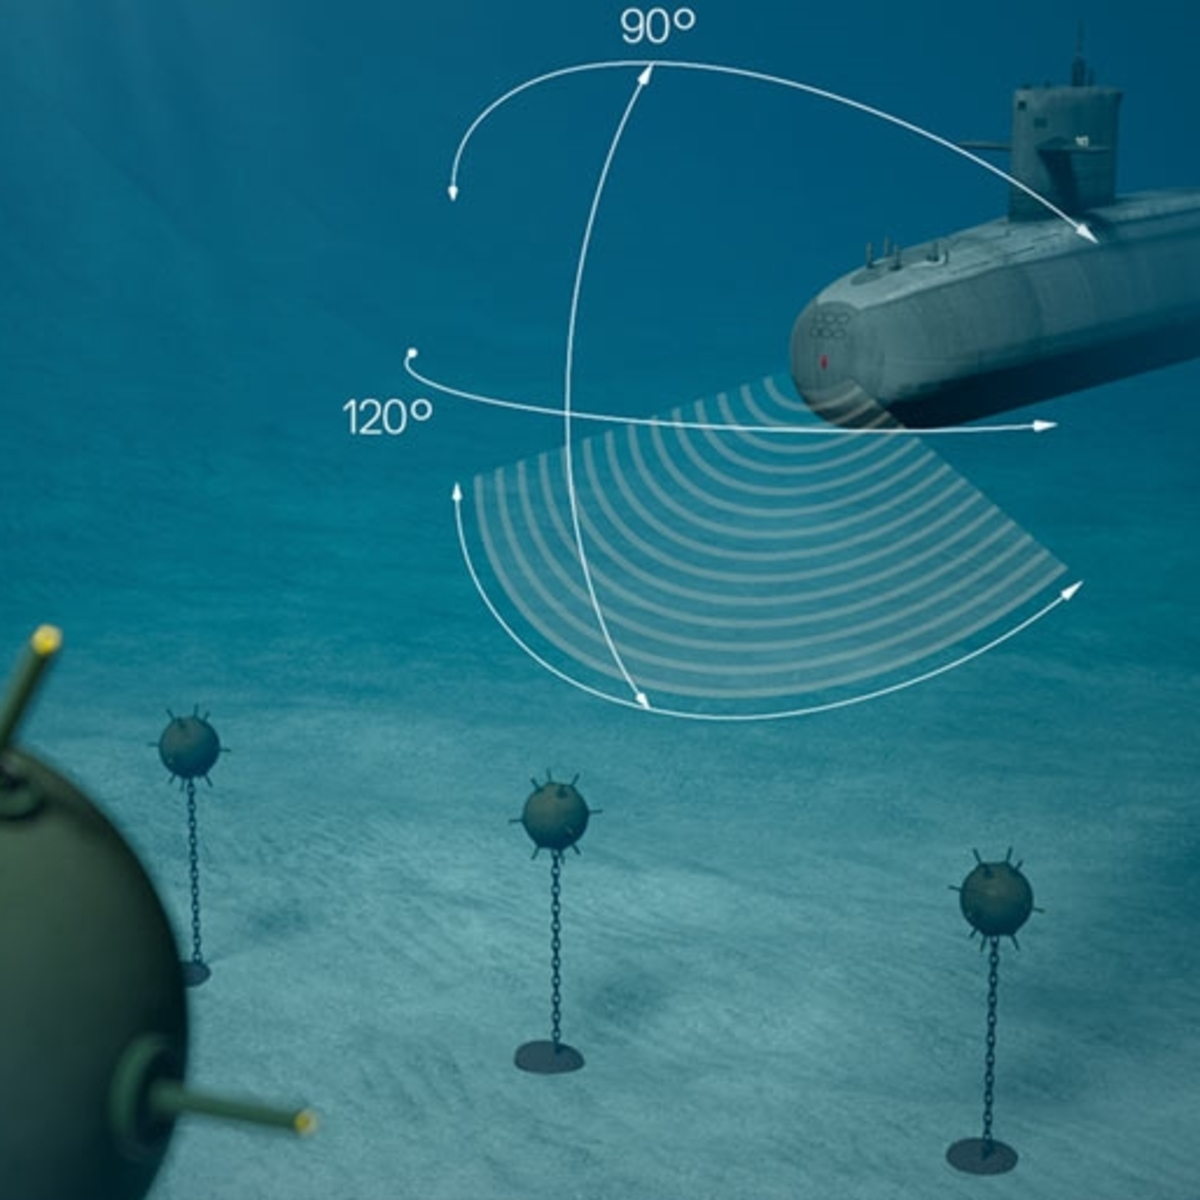

In [2]:
import pandas as pd

sonar_data=pd.read_csv('/kaggle/input/sonarrock-vs-mine/Copy of sonar data.csv',header=None)

**This notebook explores a popular use case in machine learning, which involves predicting whether an object is a rock or a mine using sonar data. The prediction task is accomplished using logistic regression, and the performance of the model is further improved by tuning the hyperparameters of the logistic regression algorithm**

In [3]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
sonar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [5]:
sonar_data.isnull().sum().sum()

0

In [6]:
sonar_data.shape

(208, 61)

In [7]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [8]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [9]:
X=sonar_data.drop(columns=[60],axis=1)
y=sonar_data[60]

In [10]:
print(X.shape)

(208, 60)


In [11]:
print(y.shape)

(208,)


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12,stratify=y)

In [14]:
print(X_train.shape)
print(y_train.shape)

(145, 60)
(145,)


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model=LogisticRegression()

In [17]:
model.fit(X_train,y_train)

LogisticRegression()

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
#accuracy on train data
X_train_prediction=model.predict(X_train)
trainind_accuracy=accuracy_score(X_train_prediction,y_train)

In [20]:
print(trainind_accuracy)

0.8482758620689655


In [21]:
#accuracy on test data
X_test_prediction=model.predict(X_test)
testing_accuracy=accuracy_score(X_test_prediction,y_test)

In [22]:
print(testing_accuracy)

0.7619047619047619


In [23]:
#Now With Hyperparameter tuning

In [24]:
from sklearn.linear_model import LogisticRegressionCV

In [25]:
model_hyperparameter=LogisticRegressionCV(cv=5,
                                          n_jobs=-1,verbose=3,
                                          max_iter=300).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           61     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04051D+01    |proj g|=  5.48795D+00


ITERATION     1

---------------- CAUCHY entered-------------------
 There are            0   breakpoints 

 GCP found in this segment
Piece      1 --f1, f2 at start point  -2.9614D+02  2.9614D+02
Distance to the stationary point =   1.0000D+00

---------------- exit CAUCHY----------------------

          61  variables are free at GCP            1
 LINE SEARCH           1  times; norm of step =    1.7478327046702258E-003

At iterate    1    f=  8.03900D+01    |proj g|=  2.89105D+00


ITERATION     2

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           2  times; norm of step =    6.2027108238487290E-003

At iterate    2    f=  8.03734D+01    |proj g|=  2.73674D+00


ITERATION     3

--------

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   61     58     66      1     0     0   2.885D-04   3.398D+01

 LINE SEARCH           0  times; norm of step =   0.93552167681852272     

 X =  1.1385D-01  4.6406D-01  3.3792D-01 -4.7324D+00 -1.5852D+00  6.6226D-02
At iterate   13    f=  3.57664D+01    |proj g|=  2.29698D-01
      8.1883D-01  8.2749D-01 -4.9719D+00 -3.6225D+00 -3.7417D+00 -3.6482D+00
     -7.9311D-01  2.7577D+00  1.2626D+00  2.9262D+00 -4.7507D-01 -8.1192D-01


ITERATION    14
     -1.6424D+00 -9.4815D-01 -2.7707D+00  4.9407D-01 -9.3667D-01 -1.8252D+00
      1.0539D+00 -1.1773D+00  3.5834D+00 -2.5632D+00  4.7285D-01 -3.8254D+00

----------------SUBSM entered

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ITERATION   105

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.23003528127340095     

At iterate   31    f=  1.80806D+01    |proj g|=  2.43544D-01


ITERATION    32

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.15200932573005277     

At iterate  105    f=  1.08370D+01    |proj g|=  1.53008D-02


ITERATION   106

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.5435088288488374     

At iterate   32    f=  1.79546D+01    |proj g|=  1.24576D-01


ITERATION    33

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.6355238575838733     

At iterate   33    f=  1.78981D+01    |proj g|=

 This problem is unconstrained.
 This problem is unconstrained.
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.1503926325537638E-003

At iterate  264    f=  1.08263D+01    |proj g|=  1.74233D-03


ITERATION   265

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.1928157515206902E-003

At iterate  265    f=  1.08263D+01    |proj g|=  3.86839D-04


ITERATION   266

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =   0.46491130734066194     

At iterate   13    f=  8.41644D+00    |proj g|=  1.45753D-01


ITERATION    14

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.5564602036551047E-003

At iterate  266    f=  1.08263D+01    |proj g|=  2.95905D-04


ITERATION   267

----------------SUBSM entered----

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
 This problem is unconstrained.


----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.22631113237184494     

At iterate   42    f=  2.73669D+00    |proj g|=  7.32089D-03


ITERATION    43
 LINE SEARCH           0  times; norm of step =    7.2466235851788782E-002


At iterate  102    f=  2.64207D+01    |proj g|=  6.16391D-03
----------------SUBSM entered-----------------


----------------exit SUBSM --------------------



ITERATION   103

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.54539504746115541     

At iterate   43    f=  2.73618D+00    |proj g|=  4.34357D-03


ITERATION    44

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    2.6801877380959689E-002

 LINE SEARCH           1  times; norm of step =   0.385777340529

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.4s remaining:    3.6s
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate  259    f=  2.72410D+00    |proj g|=  3.04117D-04


ITERATION   260

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.1603413011842567E-002

At iterate  260    f=  2.72410D+00    |proj g|=  1.63843D-04


ITERATION   261

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    9.4047475007792442E-003

At iterate  261    f=  2.72410D+00    |proj g|=  2.91619D-04


ITERATION   262

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    9.9353910783025658E-003

At iterate  262    f=  2.72410D+00    |proj g|=  3.01016D-04


ITERATION   263

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    8.8262673

 This problem is unconstrained.
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

At iterate    3    f=  1.01073D+01    |proj g|=  1.23519D+00


ITERATION     4

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.4375264169692465     

At iterate    4    f=  9.90986D+00    |proj g|=  9.11188D-01
 LINE SEARCH           1  times; norm of step =    2.5139994094656823     


ITERATION     5


----------------SUBSM entered-----------------

At iterate   44    f=  1.75367D+01    |proj g|=  8.18541D-02

----------------exit SUBSM --------------------



ITERATION    45

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    10.249371691849472     

At iterate    5    f=  9.42029D+00    |proj g|=  3.49500D-01


ITERATION     6

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =   0.18280099

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished
 This problem is unconstrained.


In [26]:
#accuracy on train data
X_train_prediction_hyperparameter=model_hyperparameter.predict(X_train)
trainind_accuracy_hyperparameter=accuracy_score(X_train_prediction_hyperparameter,y_train)

In [27]:
print(trainind_accuracy_hyperparameter)

0.896551724137931


In [28]:
#accuracy on test data
X_test_prediction_hyperparameter=model_hyperparameter.predict(X_test)
testing_accuracy_hyperparameter=accuracy_score(X_test_prediction_hyperparameter,y_test)

In [29]:
print(testing_accuracy_hyperparameter)

0.746031746031746


In [30]:
#With Standard Scaler

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()

In [33]:
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)


In [34]:
model_scaler=LogisticRegressionCV(cv=5,
                                  n_jobs=-1,verbose=3,
                                     max_iter=300).fit(X_train_scaler,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrain

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           61     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04051D+01    |proj g|=  2.54502D+01


ITERATION     1

---------------- CAUCHY entered-------------------
 There are            0   breakpoints 

 GCP found in this segment
Piece      1 --f1, f2 at start point  -9.0806D+03  9.0806D+03
Distance to the stationary point =   1.0000D+00

---------------- exit CAUCHY----------------------

          61  variables are free at GCP            1
 LINE SEARCH           1  times; norm of step =    9.3280500407561754E-003

At iterate    1    f=  7.99609D+01    |proj g|=  2.97298D+00


ITERATION     2

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.1195512997726305E-004

At iterate    2    f=  7.99600D+01    |proj g|=  2.96402D+00


ITERATION     3

--------

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.89906587694441475     

At iterate    6    f=  6.18134D+00    |proj g|=  7.19781D-01


ITERATION     7

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.78249303214980104     

At iterate    7    f=  5.98676D+00    |proj g|=  5.36977D-01


ITERATION     8

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.44416248981559342     

At iterate    8    f=  5.83573D+00    |proj g|=  2.76554D-01


ITERATION     9

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =   0.19809918365232809     

At iterate    9    f=  5.80727D+00    |proj g|=  2.24855D-01


ITERATION    10

----------------SUBSM entered---

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
 This problem is unconstrained.


At iterate   13    f=  6.14656D+01    |proj g|=  5.14189D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   61     13     16      1     0     0   5.142D-04   6.147D+01
  F =   61.465626940966118     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [35]:
#accuracy on train data
X_train_prediction_scaler=model_scaler.predict(X_train_scaler)
trainind_accuracy_scaler=accuracy_score(X_train_prediction_scaler,y_train)

In [36]:
print(trainind_accuracy_scaler)

0.8758620689655172


In [37]:
#accuracy on test data
X_test_prediction_scaler=model_scaler.predict(X_test_scaler)
testing_accuracy_scaler=accuracy_score(X_test_prediction_scaler,y_test)


In [38]:
print(testing_accuracy_scaler)

0.8095238095238095


**After applying standard scaling to the data, we observed an improvement in the test accuracy.**